In [73]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

from math import ceil


# Purpose

This notebook is meant to analyze VA data based on master.csv. 

# Reading in Data

In [74]:
master = pd.read_csv("Master/Master.csv")
df = master
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16,Percentage_Point_Wait_Over_30_Increase_Pending,Percentage_Point_Wait_Over_30_Increase_Complete
0,42899,0.0270,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,0.85,33.864542,44.0,3076.923077,0.029907,0.033158,0.052457,0.050413,0.0148,-0.0033
1,23709,0.0216,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,1.07,27.295918,48.0,5714.285714,0.038846,0.055806,0.047889,0.054539,0.0167,0.0019
2,8105,0.0517,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,-1.34,-119.642857,-291.0,-7929.155313,0.154349,0.093525,0.104459,0.102658,0.0237,-0.0044
3,85625,0.0171,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,-0.84,-50.602410,-46.0,-1749.049430,0.047089,0.051000,0.088287,0.092925,0.0272,0.0166
4,19511,0.0264,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,0.08,3.007519,-7.0,-232.558140,0.035160,0.031584,0.038942,0.042602,0.0145,-0.0003


In [75]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'ID', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'for_dups', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

In [76]:
# National
national_complete = pd.read_csv("Wait_Time/Completed_Cleaned/National_Complete.csv")
national_pending = pd.read_csv("Wait_Time/Pending_Clean/National_Pending.csv")


#used to strip time from Pending_Time
def get_date(test):
    test = test.strip('National: ')
    return parser.parse(test)

national_complete["date"] = national_complete["Complete_Time"].apply(get_date)
national_pending["date"] = national_pending["Pending_Time"].apply(get_date)
national_pending = national_pending.drop(20) #for some reason this was read in as 1989. Just dropping it


# Look at Pending Versus Complete

count       142.000000
mean      11578.147887
std       16686.819599
min       -5744.000000
25%        2814.250000
50%        7157.500000
75%       14042.250000
max      110496.000000
Name: Pending_Increase, dtype: float64
R-squared: 0.886813339425


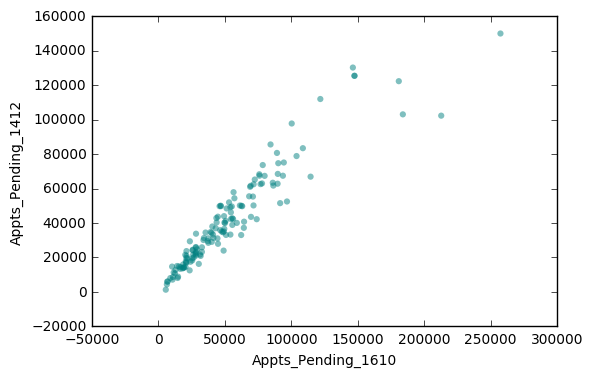

In [77]:
ax = df.plot(kind ='scatter',x='Appts_Pending_1610',y='Appts_Pending_1412',color='teal', edgecolor='none',alpha=.5)


print df["Pending_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Pending_1412"])
print "R-squared: "+ str(r_value**2)

count      142.000000
mean      2508.176056
std       3060.127245
min      -3430.000000
25%        442.500000
50%       1833.500000
75%       3926.250000
max      17594.000000
Name: Complete_Increase, dtype: float64
R-squared: 0.983101411173


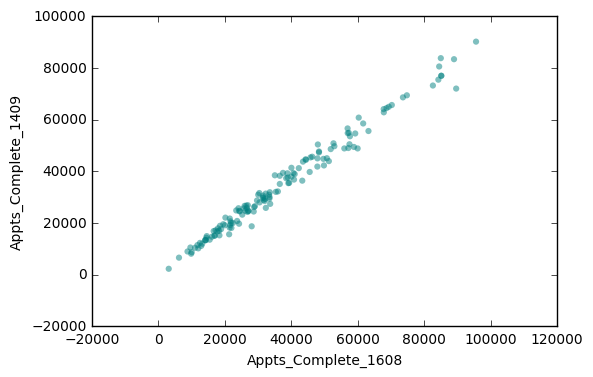

In [78]:
ax = df.plot(kind ='scatter',x='Appts_Complete_1608',y='Appts_Complete_1409',color='teal', edgecolor='none',alpha=.5)
print df["Complete_Increase"].dropna().describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Complete_1608"],df["Appts_Complete_1409"])
print "R-squared: "+ str(r_value**2)

### Thoughts
While there was an increase in both pending and completed appointments from 2014 to 2016, the pending saw a significantly bigger increase. 

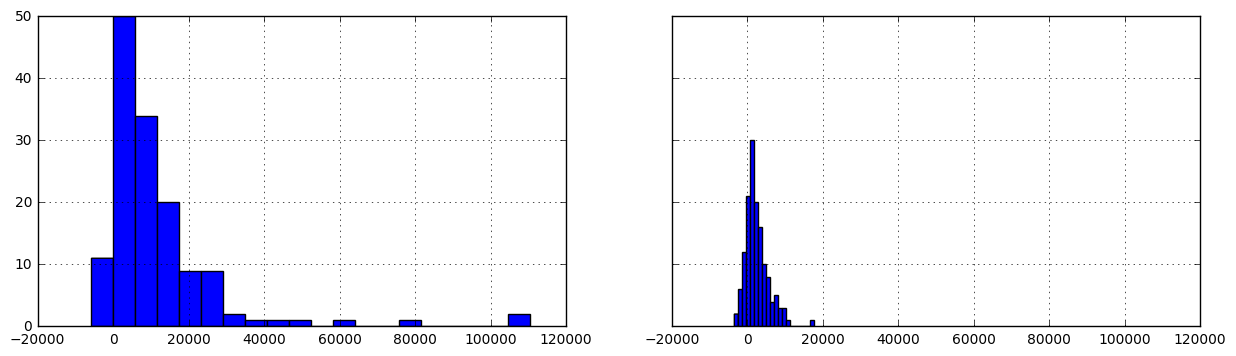

In [79]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,4))
df["Pending_Increase"].hist(bins=20, ax=ax1)
df["Complete_Increase"].hist(bins=20,ax=ax2)

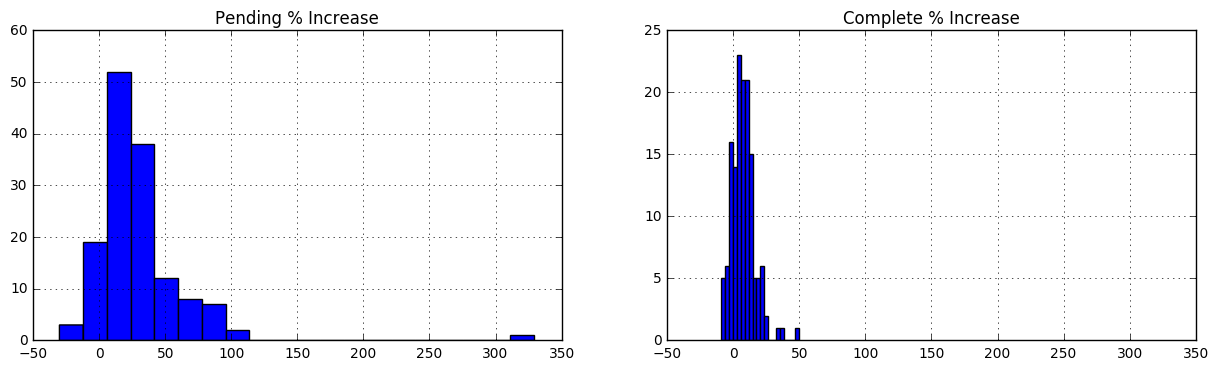

In [80]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,4))
ax1.set_title("Pending % Increase")
df["Pending_Increase_%"].hist(bins=20, ax=ax1)
ax2.set_title("Complete % Increase")
df["Complete_Increase_%"].hist(bins=20,ax=ax2)

R-squared 2014: 0.824074672188
R-squared 2016: 0.77905547197


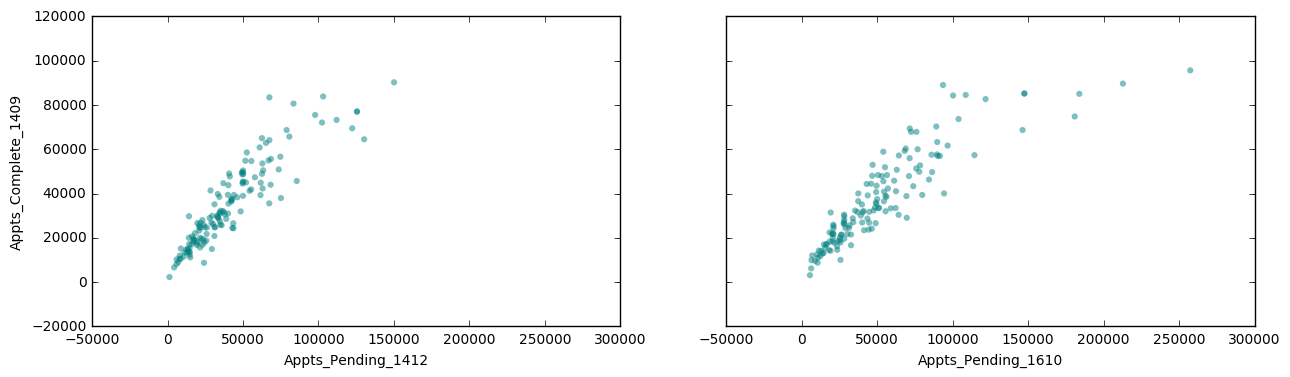

In [81]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,4))

df.plot(kind = 'scatter',x='Appts_Pending_1412', y='Appts_Complete_1409',ax=ax1,color='teal', edgecolor='none',alpha=.5)
df.plot(kind = 'scatter', x='Appts_Pending_1610', y='Appts_Complete_1608',ax=ax2,color='teal', edgecolor='none',alpha=.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1412"],df["Appts_Complete_1409"])
print "R-squared 2014: "+ str(r_value**2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Complete_1608"])
print "R-squared 2016: "+ str(r_value**2)



### Thoughts

It appears like several outliers are really dragging pending upward, but it's still a pretty large jump. 

## Appointments National

(0, 7000000)

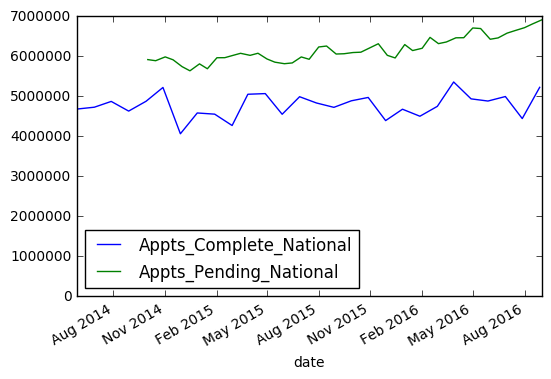

In [82]:
ax = national_complete[["Appts_Complete_National","date"]].set_index("date").plot()
national_pending[["Appts_Pending_National","date"]].set_index("date").plot(ax=ax)
ax.set_ylim(0,7000000)

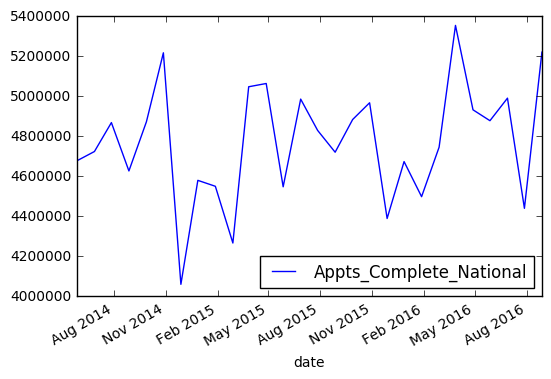

In [83]:
national_complete[["Appts_Complete_National","date"]].set_index("date").plot()

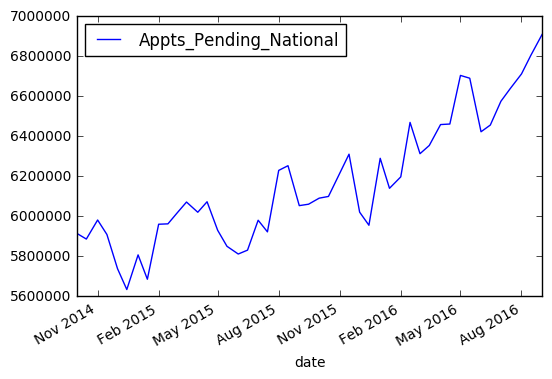

In [84]:
national_pending[["Appts_Pending_National","date"]].set_index("date").plot()

# Leadership

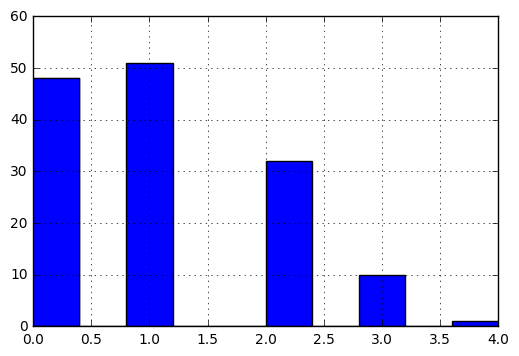

In [85]:
df["Missing_Leadership"].hist()

#### Thoughts
A majority of stations have at least one vacant or interim leadership position.

In [86]:
df["Missing_Leadership"].describe()

count    142.000000
mean       1.049296
std        0.955221
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Missing_Leadership, dtype: float64

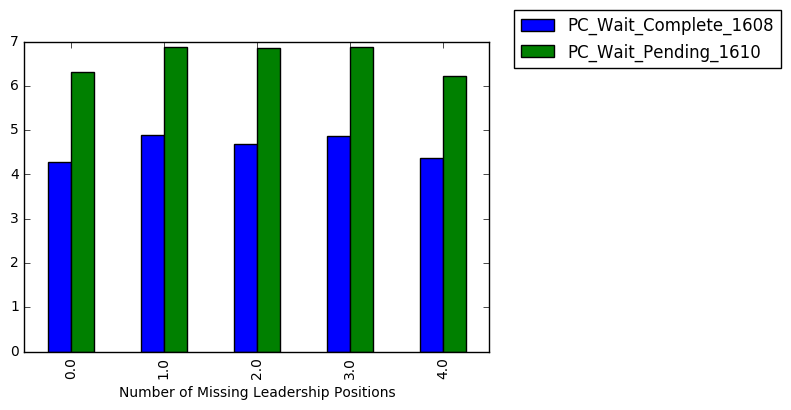

In [87]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1608','PC_Wait_Pending_1610'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

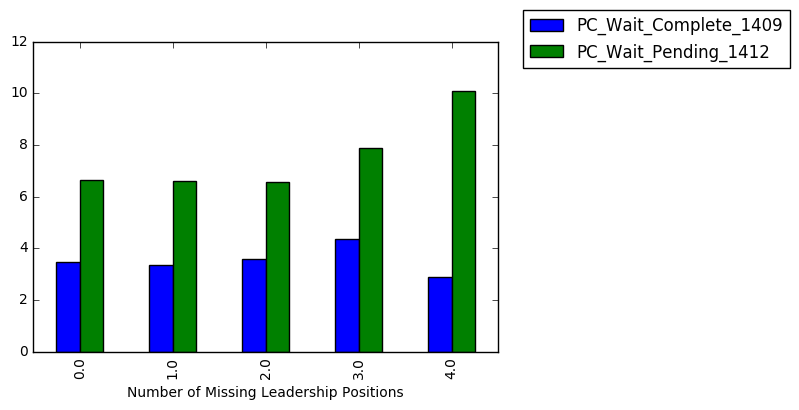

In [88]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1409','PC_Wait_Pending_1412'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
Wait times appear to be unaffected by missing leadership.

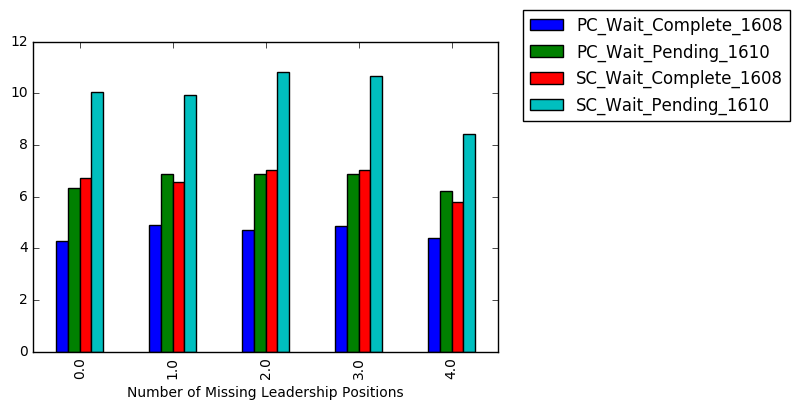

In [89]:
values = ['PC_Wait_Pending_1610','PC_Wait_Complete_1608','SC_Wait_Pending_1610','SC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

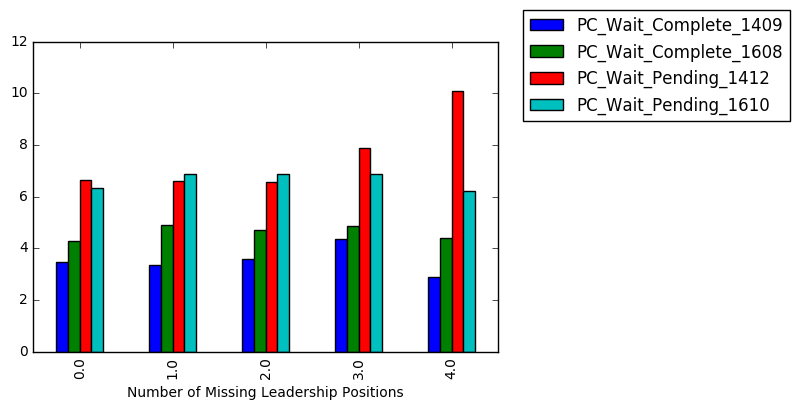

In [90]:
values = ['PC_Wait_Pending_1412','PC_Wait_Complete_1409','PC_Wait_Pending_1610','PC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

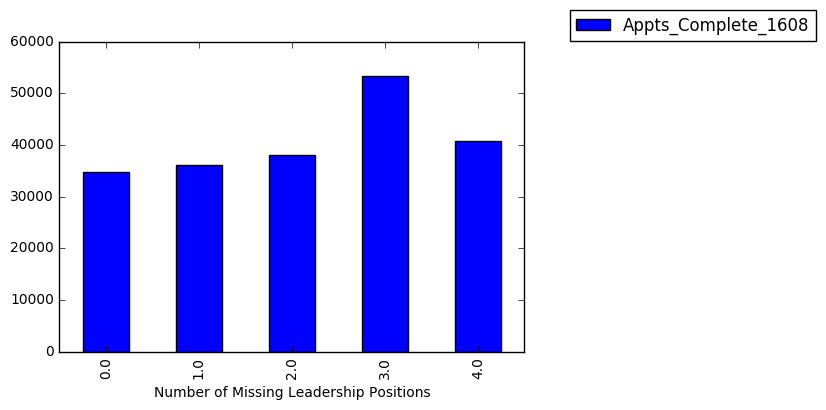

In [91]:
values = ['Appts_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

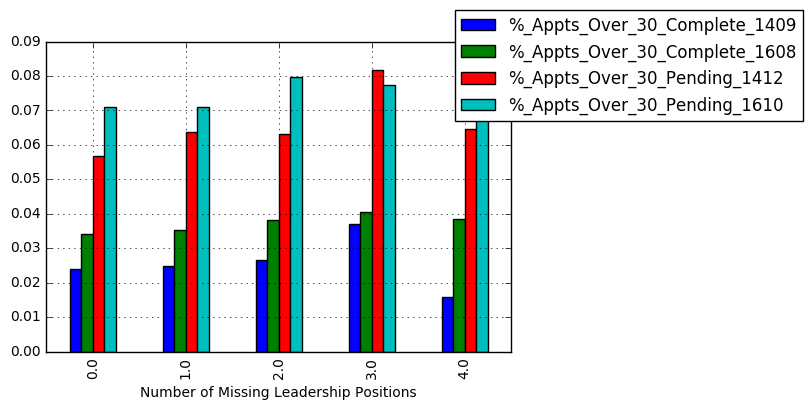

In [181]:
values = ["%_Appts_Over_30_Complete_1409","%_Appts_Over_30_Complete_1608",
          "%_Appts_Over_30_Pending_1412","%_Appts_Over_30_Pending_1610"]


pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

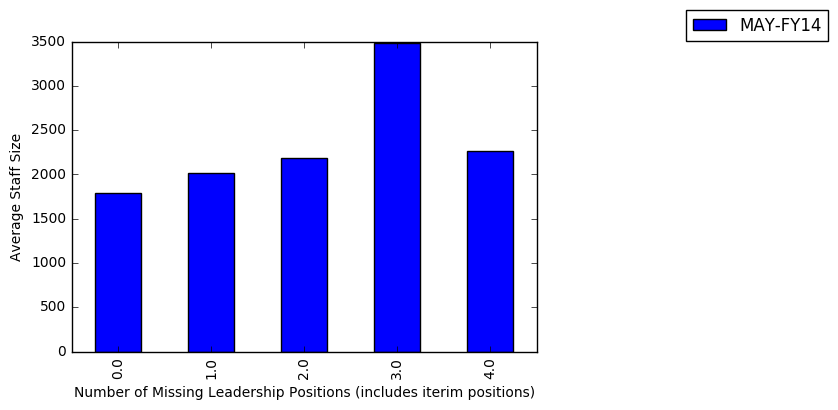

In [92]:
values = ['MAY-FY14']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions (includes iterim positions)")
ax.set_ylabel("Average Staff Size")

#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

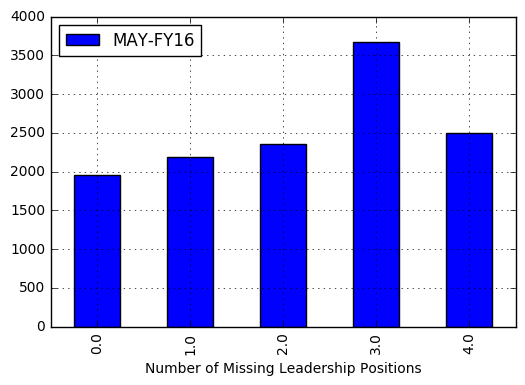

In [93]:
values = ["MAY-FY16"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)

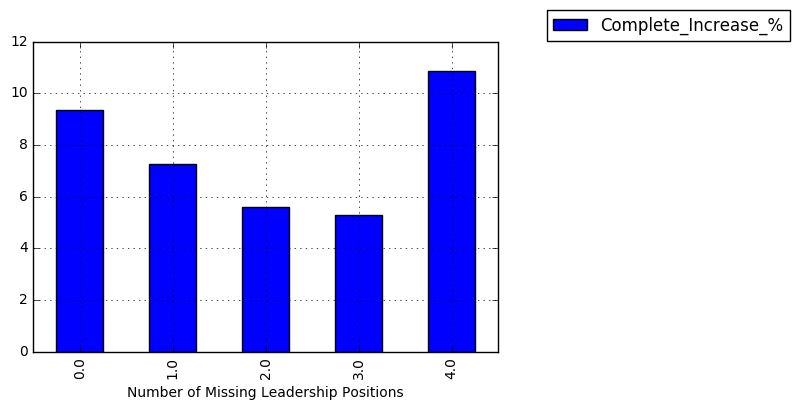

In [94]:
values = ["Complete_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)


plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

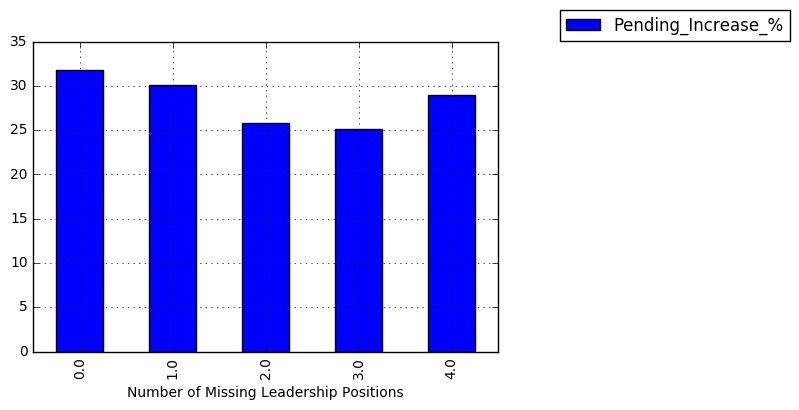

In [95]:
values = ["Pending_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
While the raw numbers show more completed appointments, it appears that this is just because there are bigger stations. Missing leadership does appear to have an affect on the percent increase of completed appointments. Pending saw a similar affect. 

# Wait Times

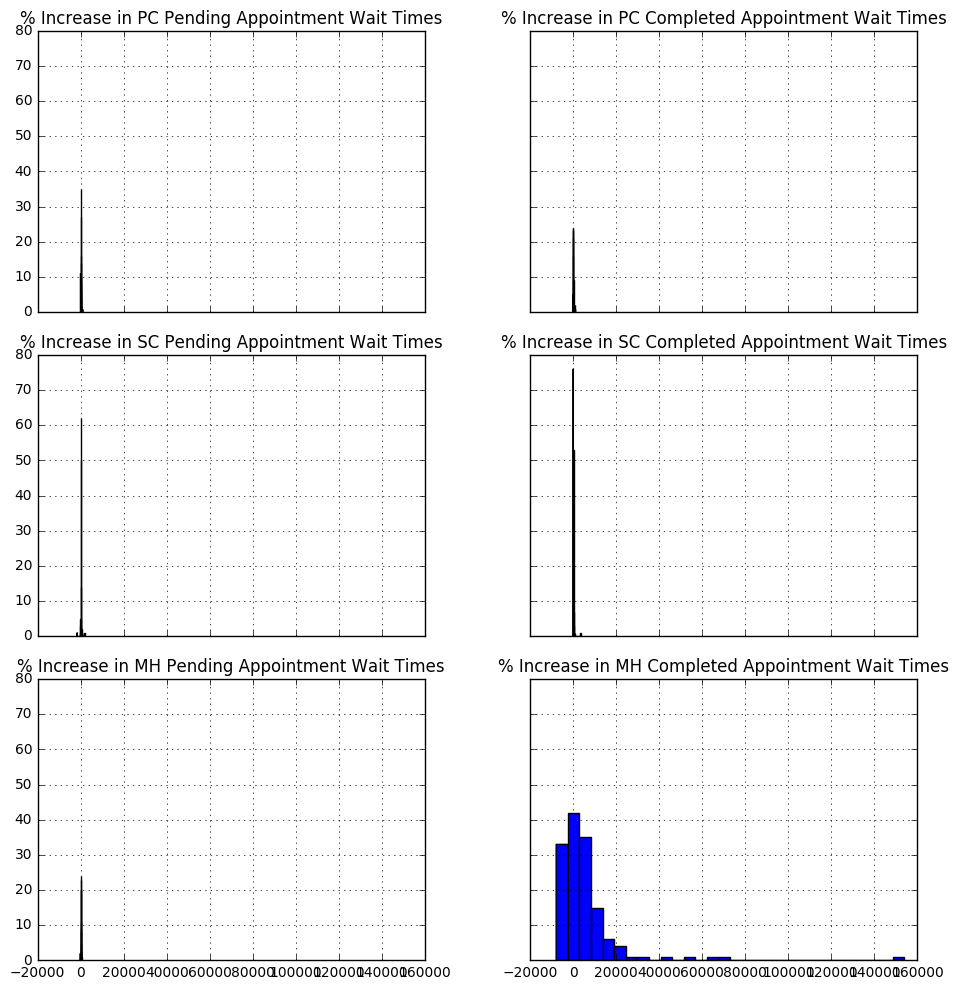

In [96]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10,10))

df["PC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax1)
ax1.set_title("% Increase in PC Pending Appointment Wait Times")

df["PC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax2)
ax2.set_title("% Increase in PC Completed Appointment Wait Times")

df["SC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax3)
ax3.set_title("% Increase in SC Pending Appointment Wait Times")

df["SC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax4)
ax4.set_title("% Increase in SC Completed Appointment Wait Times")

df["MH_Wait_Pending_Increase_%"].hist(bins=30, ax=ax5)
ax5.set_title("% Increase in MH Pending Appointment Wait Times")

df["MH_Wait_Complete_Increase_%"].hist(bins=30, ax=ax6)
ax6.set_title("% Increase in MH Completed Appointment Wait Times")

plt.tight_layout()

In [97]:
def multiples(metric, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
    ax1.set_title("PC Pending")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,color='teal', edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,color='teal', edgecolor='none',alpha=.5)
    ax2.set_title("PC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,color='teal', edgecolor='none',alpha=.5)
    ax3.set_title("SC Pending")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,color='teal', edgecolor='none',alpha=.5)
    ax4.set_title("SC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,color='teal', edgecolor='none',alpha=.5)
    ax5.set_title("MH Pending")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,color='teal', edgecolor='none',alpha=.5)
    ax6.set_title("MH Complete")
    plt.tight_layout()


In [98]:
def multiples(metric, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
    ax1.set_title("PC Pending")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,color='teal', edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,color='teal', edgecolor='none',alpha=.5)
    ax2.set_title("PC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,color='teal', edgecolor='none',alpha=.5)
    ax3.set_title("SC Pending")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,color='teal', edgecolor='none',alpha=.5)
    ax4.set_title("SC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,color='teal', edgecolor='none',alpha=.5)
    ax5.set_title("MH Pending")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,color='teal', edgecolor='none',alpha=.5)
    ax6.set_title("MH Complete")
    plt.tight_layout()
    
    


Staff Increase, Wait Times % Increase


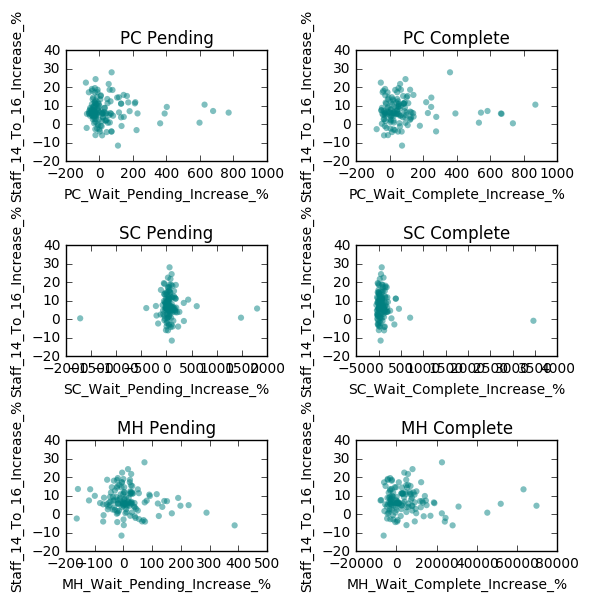

In [99]:
multiples('Staff_14_To_16_Increase_%', 'Staff Increase')

Choice Hires Percent Increase over 2014 Staff, Wait Times % Increase


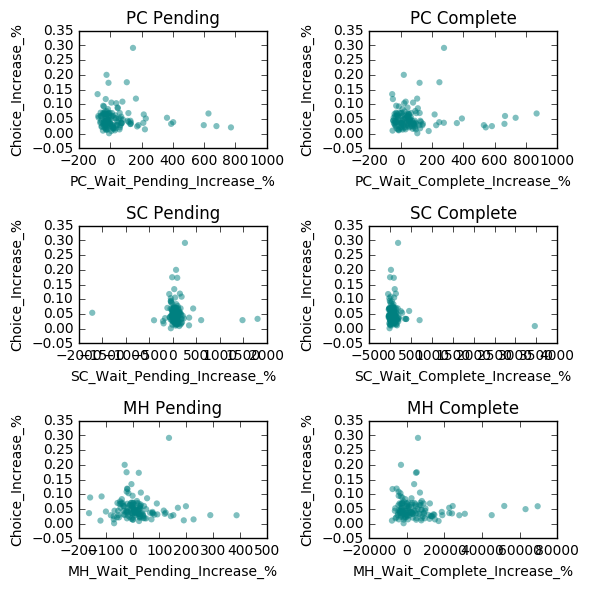

In [100]:
multiples("Choice_Increase_%","Choice Hires Percent Increase over 2014 Staff")

In [101]:
def multiples_wait(metric1, metric2, metric3, metric4, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

    ax1.set_title("Pending Dec 2014")
    df.plot(kind ='scatter',y=metric1, x ="PC_Wait_Pending_1412", ax=ax1)

    ax2.set_title("Complete Sept 2014")
    df.plot(kind ='scatter',y=metric2, x ="PC_Wait_Complete_1409", ax=ax2)

    ax3.set_title("Pending Oct 2016")
    df.plot(kind ='scatter',y=metric3, x ="SC_Wait_Pending_1610", ax=ax3)

    ax4.set_title("Complete Aug 2016")
    df.plot(kind ='scatter',y=metric4, x ="SC_Wait_Complete_1608", ax=ax4)

    plt.tight_layout()

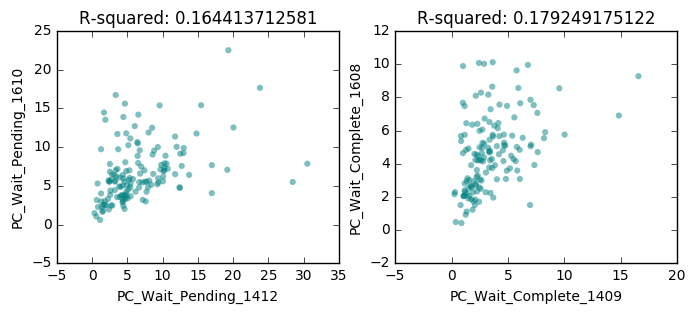

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))



slope, intercept, r_value, p_value, std_err = stats.linregress(df["PC_Wait_Pending_1412"],df["PC_Wait_Pending_1610"])
R =  "R-squared: "+ str(r_value**2)
ax1.set_title(R)
df.plot(kind='scatter',x="PC_Wait_Pending_1412",y="PC_Wait_Pending_1610",ax=ax1,color='teal', edgecolor='none',alpha=.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["PC_Wait_Complete_1409"],df["PC_Wait_Complete_1608"])
R =  "R-squared: "+ str(r_value**2)
ax2.set_title(R)
df.plot(kind='scatter',x="PC_Wait_Complete_1409",y="PC_Wait_Complete_1608",ax=ax2,color='teal', edgecolor='none',alpha=.5)


### Thoughts

It should be incredible rare for any station to have a higher number of choice hires than staff increase between 2014 and 2016 - unless staffing was reduced. In places where staffing wasn't reduced, this shouldn't happen often if at all.

For one, Veterans Choice passed June 11th, 2014. These staffing numbers are for May for each year. This choice hire data is also for June, so there is an extremely small window here for big shifts. From my understand, the choice hires were meant to be in addition to normal hires. This seems to suggest that many positions that should have been filled in without the extra spending money were filled in by choice hires.

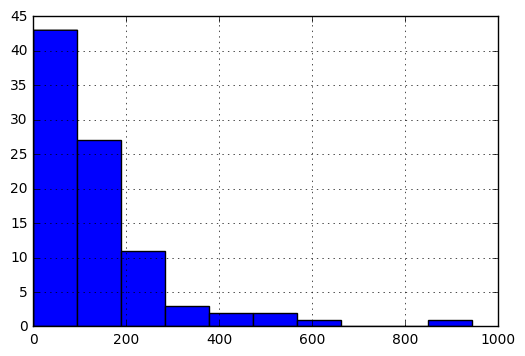

In [103]:
hist = df[df["Choice_Staff_Dif"]>0]
hist["Choice_Staff_Dif"].hist()

In [104]:
staff_increased = df[df["Staff_14_To_16_Increase_%"] >0]
staff_increased[staff_increased["Choice_Staff_Dif"] < 0]["Choice_Staff_Dif"]

8      -12.0
14      -1.0
19     -55.0
20     -28.0
21     -13.0
23     -26.0
25    -102.0
27     -13.0
28     -34.0
30     -37.0
35     -10.0
58     -69.0
62     -11.0
69     -39.0
76     -27.0
88     -21.0
103    -28.0
116    -83.0
120     -3.0
127    -43.0
133    -59.0
141     -8.0
Name: Choice_Staff_Dif, dtype: float64

## Staff

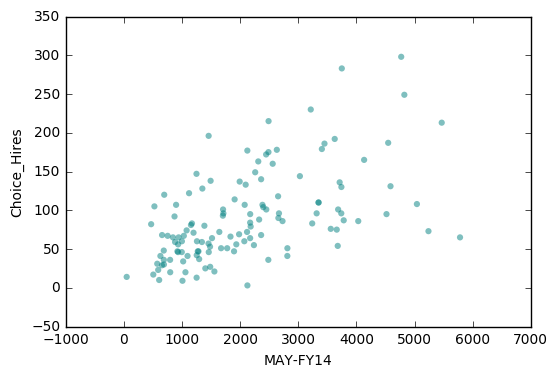

In [105]:
df[["Choice_Hires","MAY-FY14"]].plot(kind='scatter',y='Choice_Hires',x="MAY-FY14",color='teal', edgecolor='none',alpha=.5)

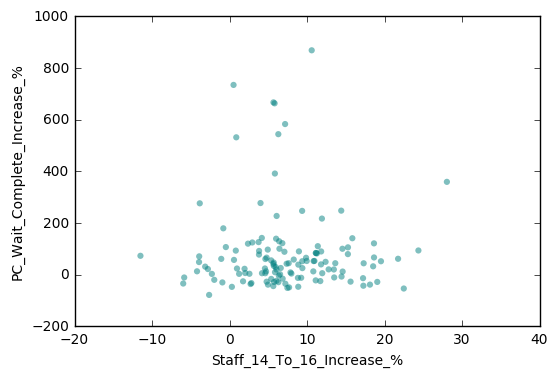

In [106]:
df.plot(kind="scatter",x="Staff_14_To_16_Increase_%",y="PC_Wait_Complete_Increase_%",color='teal', edgecolor='none',alpha=.5)

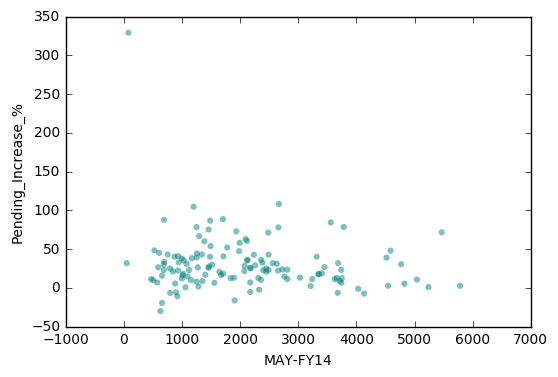

In [107]:
df.plot(kind="scatter",x="MAY-FY14",y="Pending_Increase_%",color='teal', edgecolor='none',alpha=.5)

# Let's double check some of these correlation - or lack of correlations - by binning them

## Wait Times

In [108]:
def grouped(group,valuey):
    table = pd.pivot_table(df,index=[group],values=[valuey],aggfunc=[np.mean])
    table.columns = table.columns.get_level_values(0)
    table = table.reset_index()
    table.columns = [group,valuey]
    table.plot(kind="bar",x=group,y=valuey,color='teal',edgecolor='none')
    
def grouped_reverse(group,valuey):
    table = pd.pivot_table(df,index=[group],values=[valuey],aggfunc=[np.mean])
    table.columns = table.columns.get_level_values(0)
    table = table.reset_index()
    table.columns = [group,valuey]
    table.plot(kind="bar",y=group,x=valuey,color='teal',edgecolor='none')

def ceil_100(number):
    return ceil(number*100)

def ceil_100_divide(number):
    return ceil(number/100)*100

In [109]:
# binning
df["PC_Wait_Pending_1412_ceil"] = df["PC_Wait_Pending_1412"].apply(ceil)
df["PC_Wait_Pending_1610_ceil"] = df["PC_Wait_Pending_1610"].apply(ceil)
df["PC_Wait_Complete_1409_ceil"] = df["PC_Wait_Complete_1409"].apply(ceil)
df["PC_Wait_Complete_1608_ceil"] = df["PC_Wait_Complete_1608"].apply(ceil)
df['PC_Wait_Pending_Increase_%_ceil']=df['PC_Wait_Pending_Increase_%'].apply(ceil)
df['Choice_Increase_%_ceil']=df['Choice_Increase_%'].apply(ceil_100)
df['MAY-FY14_Ceil'] = df["MAY-FY14"].apply(ceil_100_divide)




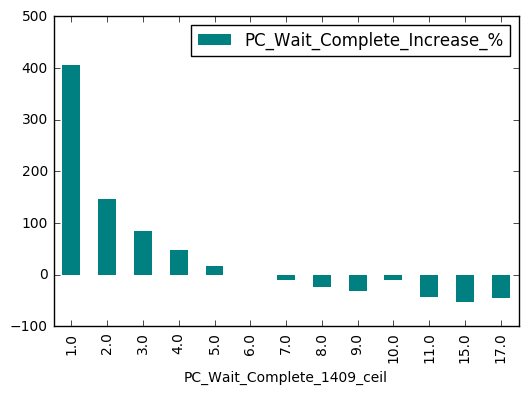

In [110]:
grouped("PC_Wait_Complete_1409_ceil",'PC_Wait_Complete_Increase_%')


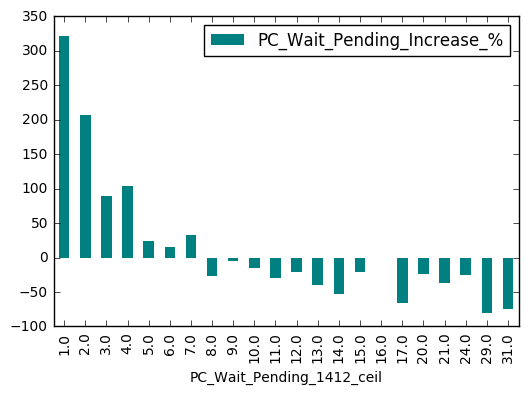

In [111]:
grouped("PC_Wait_Pending_1412_ceil",'PC_Wait_Pending_Increase_%')


## Hires

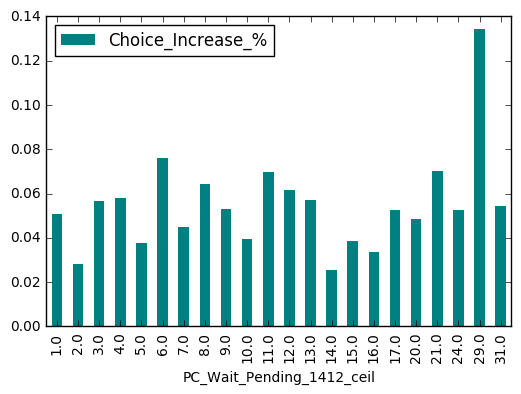

In [112]:
grouped("PC_Wait_Pending_1412_ceil",'Choice_Increase_%')


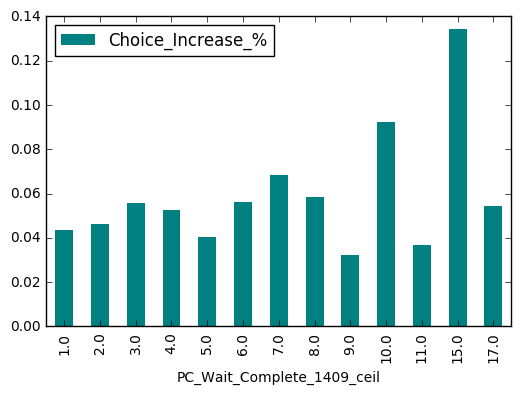

In [113]:
grouped("PC_Wait_Complete_1409_ceil",'Choice_Increase_%')


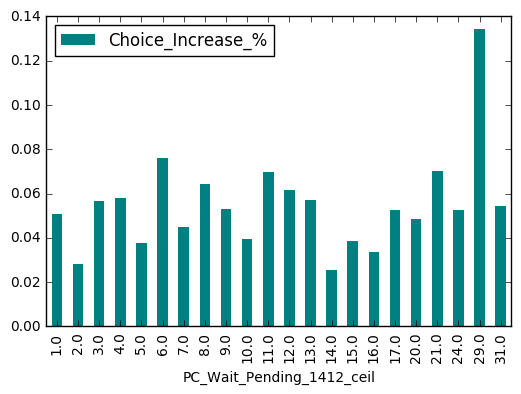

In [114]:
grouped("PC_Wait_Pending_1412_ceil",'Choice_Increase_%')


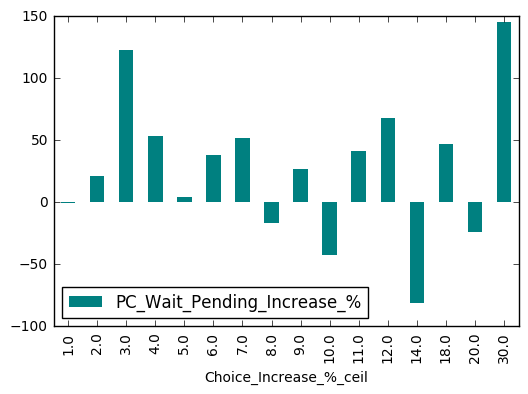

In [115]:
grouped('Choice_Increase_%_ceil','PC_Wait_Pending_Increase_%')


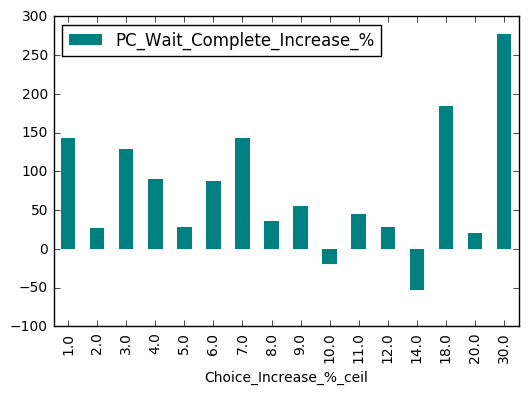

In [116]:
grouped('Choice_Increase_%_ceil','PC_Wait_Complete_Increase_%')


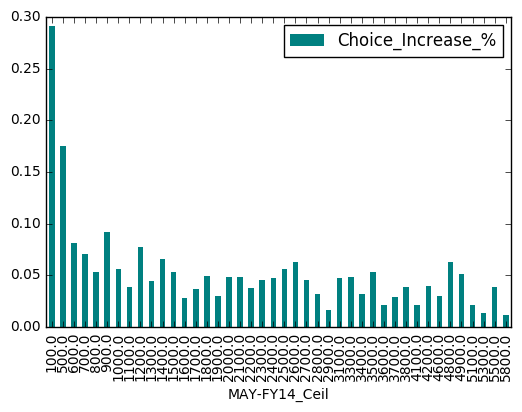

In [117]:
grouped('MAY-FY14_Ceil','Choice_Increase_%',)


In [118]:
df["Choice_Increase_%"]

0      0.036633
1      0.051031
2      0.010392
3      0.021329
4      0.069971
5      0.045283
6      0.043964
7      0.014580
8      0.291667
9           NaN
10          NaN
11          NaN
12          NaN
13     0.028700
14     0.018130
15     0.013487
16     0.014678
17     0.024802
18     0.060021
19     0.103501
20     0.054007
21     0.066969
22     0.028571
23     0.043541
24     0.057762
25     0.070502
26     0.052554
27     0.059265
28     0.071540
29     0.030502
         ...   
112    0.033978
113    0.016474
114    0.033597
115    0.068582
116    0.034741
117    0.077014
118    0.052936
119    0.119154
120    0.174840
121    0.065287
122         NaN
123    0.105626
124    0.108831
125         NaN
126    0.039923
127    0.117694
128    0.062500
129    0.051492
130    0.059297
131    0.086380
132    0.047556
133    0.021424
134    0.046185
135    0.069002
136    0.018886
137    0.020481
138    0.013931
139         NaN
140         NaN
141    0.043849
Name: Choice_Increase_%,

# Did psychiatrist go where they were needed?

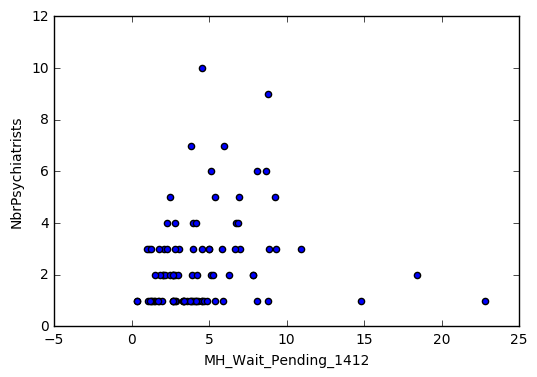

In [120]:
df.plot(kind='scatter',x='MH_Wait_Pending_1412',y="NbrPsychiatrists")

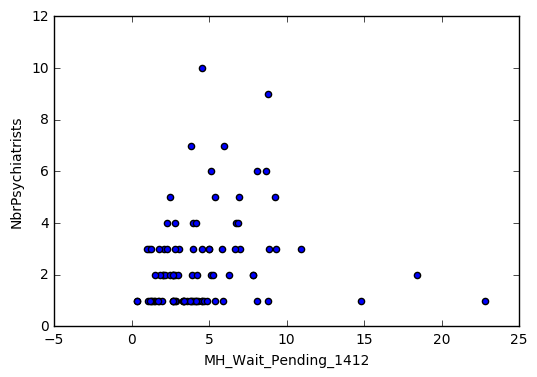

In [121]:
df.plot(kind='scatter',x='MH_Wait_Pending_1412',y="NbrPsychiatrists")

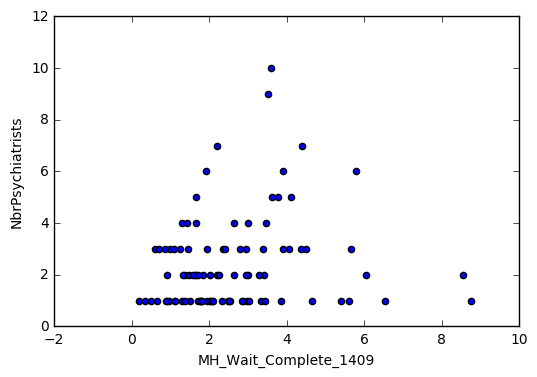

In [122]:
df.plot(kind='scatter',x='MH_Wait_Complete_1409',y="NbrPsychiatrists")

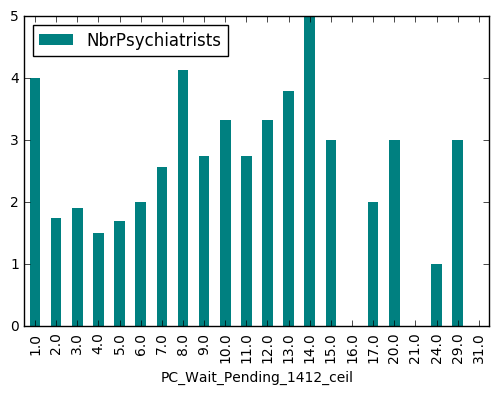

In [125]:
grouped("PC_Wait_Pending_1412_ceil",'NbrPsychiatrists')

# Did staffing corespond with appointments?

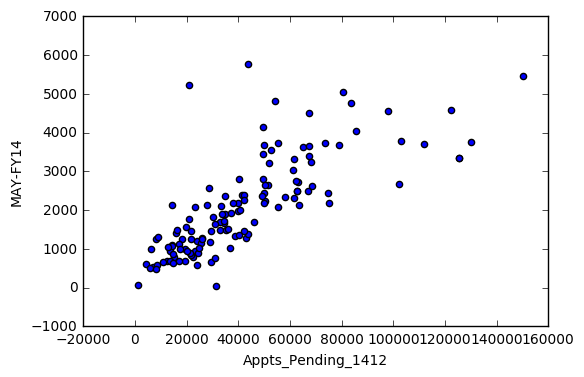

In [126]:
df.plot(kind='scatter',x='Appts_Pending_1412',y='MAY-FY14')

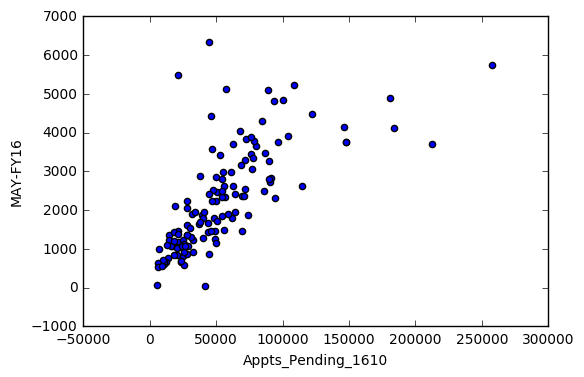

In [127]:
df.plot(kind='scatter',x='Appts_Pending_1610',y='MAY-FY16')

# Looking at percent appointments over 30 days instead

Percent of Appointments Over 30 days Pending Dec 2014, Wait Times % Increase


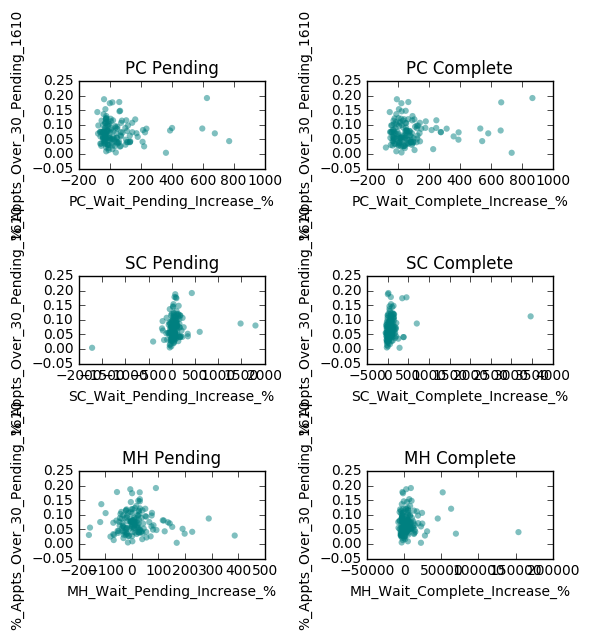

In [128]:
multiples('%_Appts_Over_30_Pending_1610','Percent of Appointments Over 30 days Pending Dec 2014')

In [177]:
def over_30_to_average(care,appointment,date,ax):

    df.plot(kind='scatter',x='{}_Wait_{}_{}'.format(care,appointment,date),y='%_Appts_Over_30_{}_{}'.format(appointment,date),ax=ax,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df['{}_Wait_{}_{}'.format(care,appointment,date)],df['%_Appts_Over_30_{}_{}'.format(appointment,date)])
    ax.set_title("R-squared {} {} {}: {}".format(care,appointment,date,str(r_value**2)))

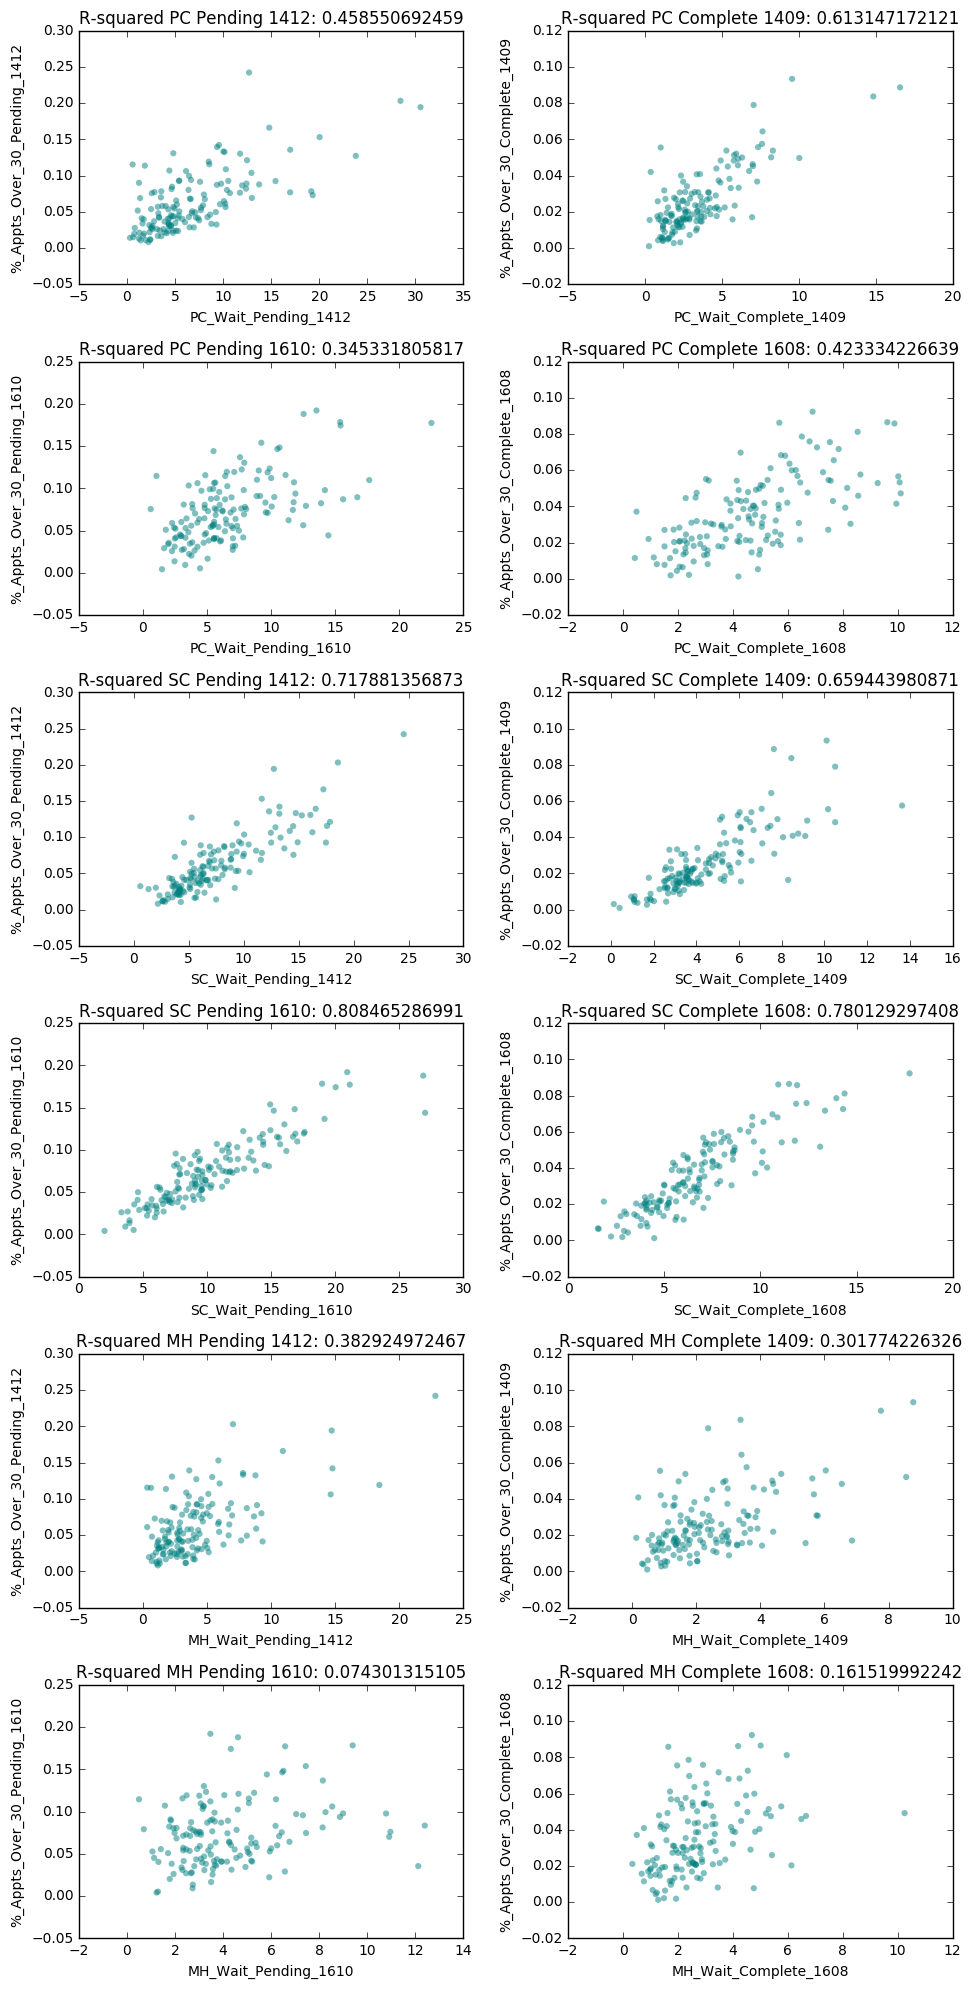

In [178]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
over_30_to_average("PC","Pending","1412",ax1)
over_30_to_average("PC","Complete","1409",ax2)
over_30_to_average("PC","Pending","1610",ax3)
over_30_to_average("PC","Complete","1608",ax4)
over_30_to_average("SC","Pending","1412",ax5)
over_30_to_average("SC","Complete","1409",ax6)
over_30_to_average("SC","Pending","1610",ax7)
over_30_to_average("SC","Complete","1608",ax8)
over_30_to_average("MH","Pending","1412",ax9)
over_30_to_average("MH","Complete","1409",ax10)
over_30_to_average("MH","Pending","1610",ax11)
over_30_to_average("MH","Complete","1608",ax12)

plt.tight_layout()


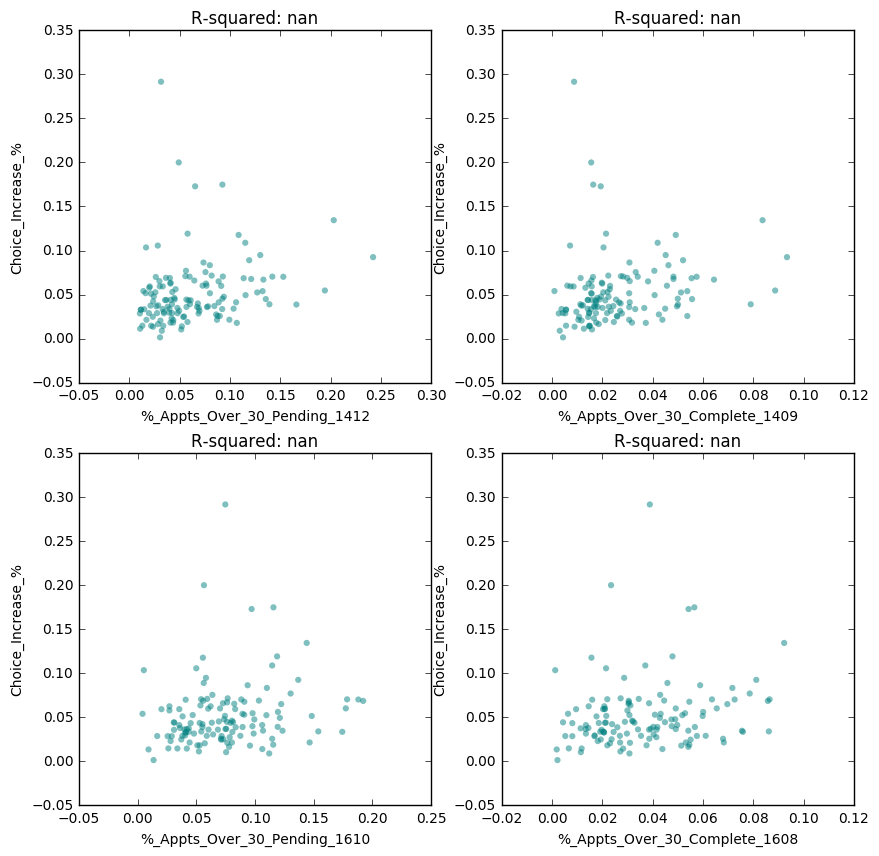

In [196]:
def over_30_factor(factor):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    df.plot(kind='scatter',x='%_Appts_Over_30_Pending_1412',y=factor,ax=ax1,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Pending_1412"],df[factor])
    ax1.set_title("R-squared: {}".format(str(r_value**2)))    

    df.plot(kind='scatter',x='%_Appts_Over_30_Complete_1409',y=factor,ax=ax2,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Complete_1409"],df[factor])
    ax2.set_title("R-squared: {}".format(str(r_value**2)))  
    
    df.plot(kind='scatter',x='%_Appts_Over_30_Pending_1610',y=factor,ax=ax3,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Pending_1610"],df[factor])
    ax3.set_title("R-squared: {}".format(str(r_value**2)))  
    
    df.plot(kind='scatter',x='%_Appts_Over_30_Complete_1608',y=factor,ax=ax4,color='teal',alpha=.5,edgecolor='None')
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df["%_Appts_Over_30_Complete_1608"],df[factor])
    ax4.set_title("R-squared: {}".format(str(r_value**2)))  
    
    
    
    
over_30_factor("Choice_Increase_%")


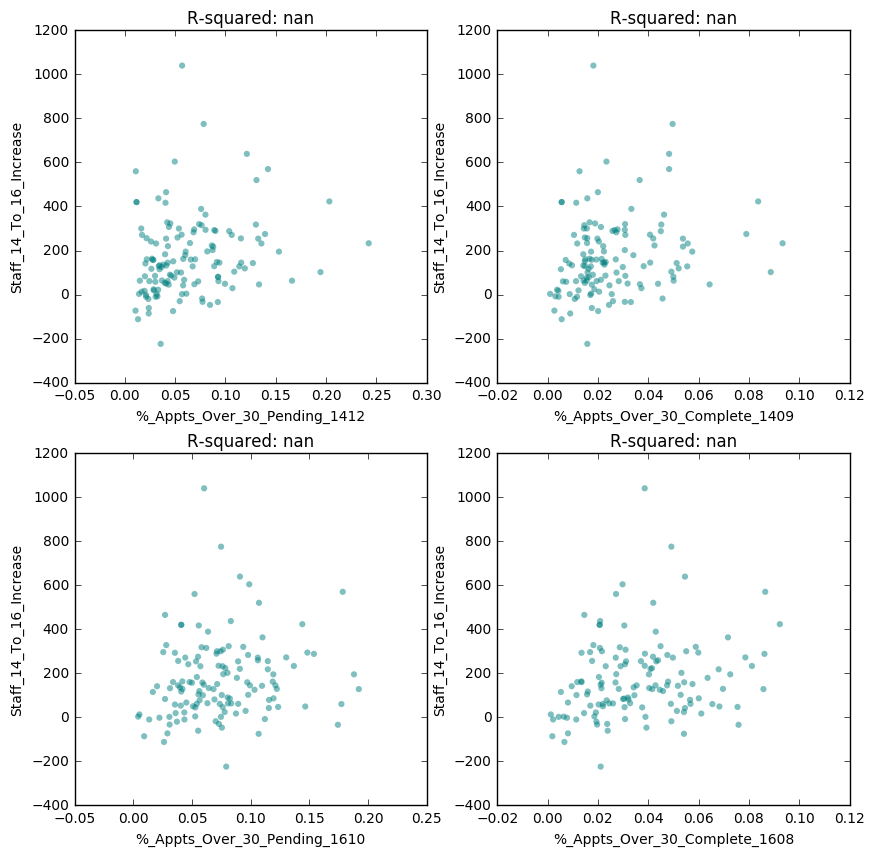

In [197]:
over_30_factor('Staff_14_To_16_Increase')

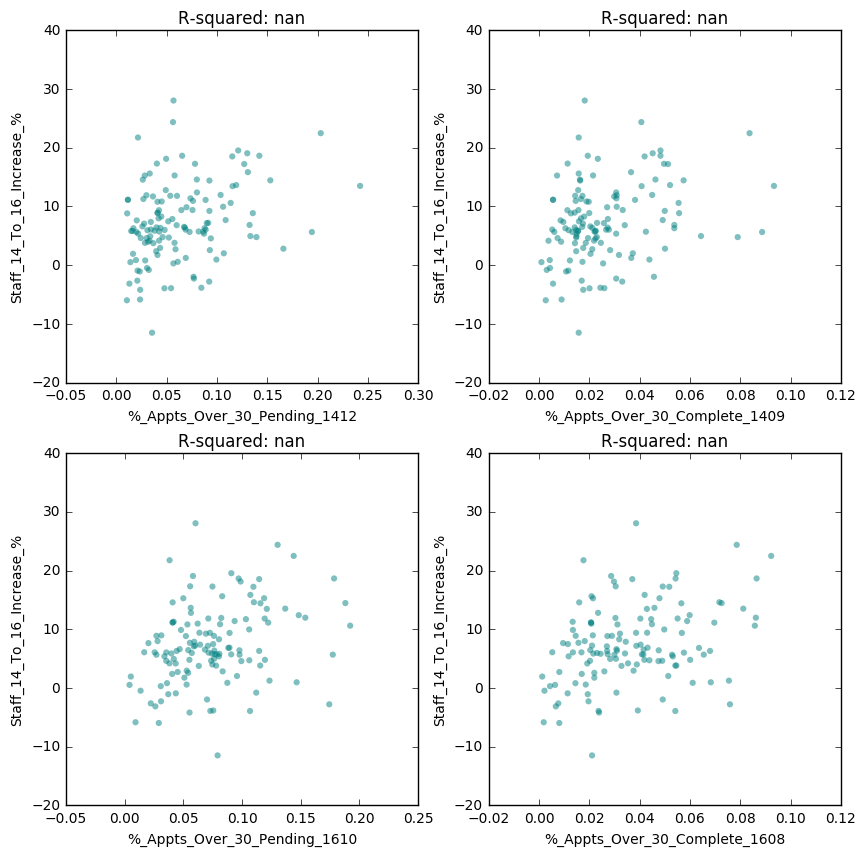

In [200]:
over_30_factor('Staff_14_To_16_Increase_%')

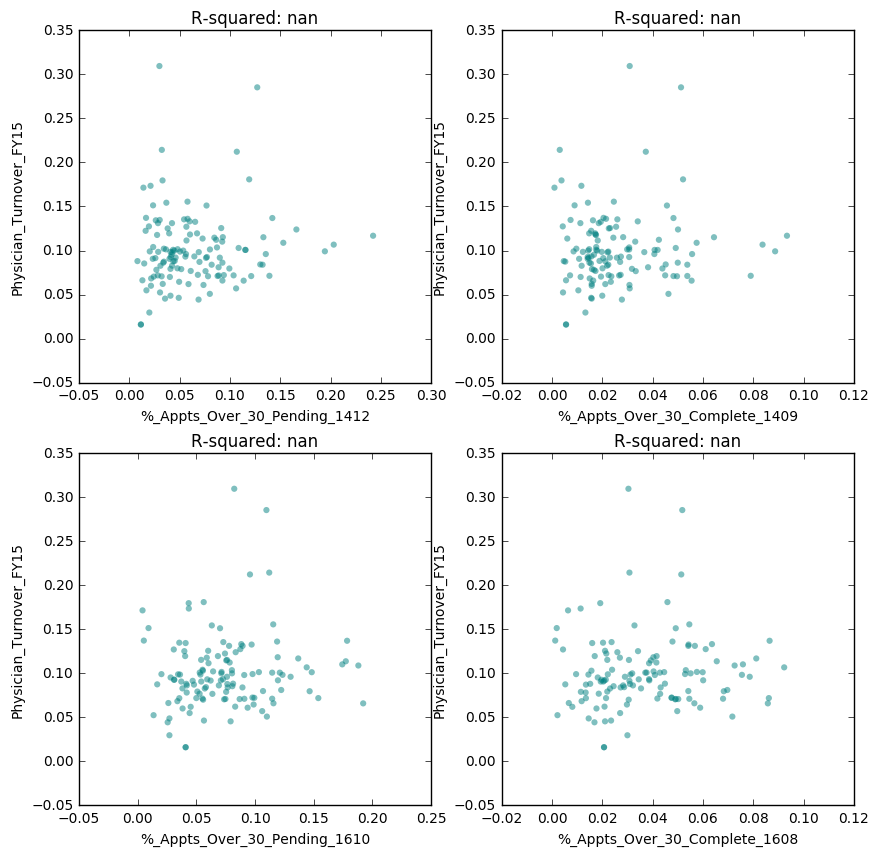

In [201]:
over_30_factor('Physician_Turnover_FY15')

In [129]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'ID', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'for_dups', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

In [ ]:
metric = '%_Appts_Over_30_Pending_1610'
label = 'test'
print("{}, Wait Times % Increase".format(label))
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
ax1.set_title("PC Pending")
#ax1.set_ylabel(False)
#ax1.set_ylabel(False)
df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,color='teal', edgecolor='none',alpha=.5)

df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,color='teal', edgecolor='none',alpha=.5)
ax2.set_title("PC Complete")

df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,color='teal', edgecolor='none',alpha=.5)
ax3.set_title("SC Pending")

df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,color='teal', edgecolor='none',alpha=.5)
ax4.set_title("SC Complete")

df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,color='teal', edgecolor='none',alpha=.5)
ax5.set_title("MH Pending")

df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,color='teal', edgecolor='none',alpha=.5)
ax6.set_title("MH Complete")
plt.tight_layout()

In [ ]:
df['%_Appts_Over_30_Pending_1610']

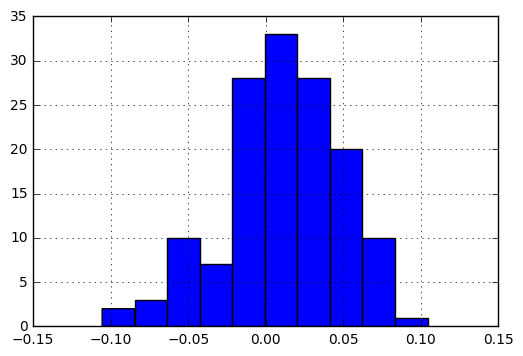

In [198]:
df["Percentage_Point_Wait_Over_30_Increase_Pending"].hist()

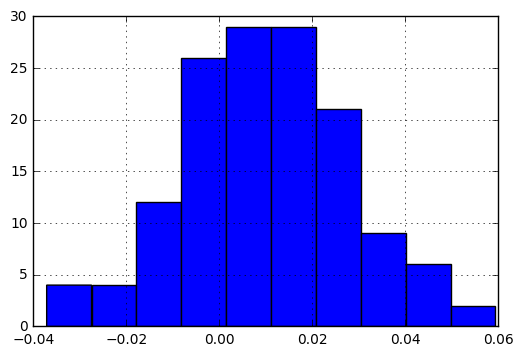

In [199]:
df["Percentage_Point_Wait_Over_30_Increase_Complete"].hist()